In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
plt.style.use('science')
matplotlib.rcParams.update({'font.size': 18})
import h5py
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# You will need to install SmBBHTF and ldc packages if you don't have them already
# LDC from pip3 install lisa-data-challenge (just used to generate noise PSD)

from SmBBHTF.waveforms.time_frequency import TaylorF2EccTF
from ldc.lisa.noise import get_noise_model


In [22]:
low_f_results = np.loadtxt('../Result_files/low_f/final_best_positions.txt')
high_f_results = np.loadtxt('../Result_files/high_f/final_best_positions.txt')


In [23]:
search_results = []


In [24]:
search_results.extend(list(high_f_results[high_f_results[:,-1]>90]))

In [25]:
search_results.extend(list(low_f_results[low_f_results[:,-1]>90]))

In [26]:
search_results = np.array(search_results)

In [27]:
high_f_results[high_f_results[:,-1]>90]

array([[ 3.91494038e+01,  1.00052173e+00, -6.40913397e-01,
         7.27735580e-06,  1.13111247e-02,  3.27825444e+00,
        -1.23754141e+00,  1.58578944e+00,  4.94797615e+02],
       [ 2.74217729e+01,  3.29526072e+00,  4.76407046e-01,
         4.00839293e-04,  1.22427271e-02,  3.50651463e+00,
         1.05125580e-01,  1.55687599e+00,  1.51838225e+02],
       [ 2.60842487e+01,  5.80888036e+00, -4.29130769e-01,
         9.23651548e-03,  2.37671080e-02,  1.13999540e+00,
        -7.72968813e-01,  2.25652847e+00,  1.41256236e+02],
       [ 2.24111399e+01,  3.64825175e+00,  3.44875260e-02,
         3.64292581e-05,  2.76543486e-02,  1.69658166e+00,
         1.52459253e-01,  1.64933495e+00,  4.09177480e+02]])

In [28]:
delta_mc = []
delta_lambda = []
delta_beta = []
delta_f_low = []

OVERWRITE SEARCH WITH REPEATED SEARCH IN THIS TILE

SOURCE: /rds/projects/m/moorecj-db-gwanalysis/TF_search/full_search/high_frequencies/tile_238

In [29]:
# BODGED OVERWRITE WITH REPEATED SEARCH
search_results[2] = np.array([ 2.60907014e+01 ,7.17696095e+00, -4.70848073e-01,  2.46814733e-05,
  2.37677896e-02,  8.09469258e-01, -6.73925164e-01,  7.48418535e-01,405.45371475844576])

In [48]:
# NOTE: you need to manually download yorsh_1b-1_training_sobhb.h5 and place it in this directory
# for some reason the LDC website seems to be down for me right now but it should be somewhere on https://lisa-ldc.lal.in2p3.fr/
f = h5py.File('../Large_files/yorsh_1b-1_training_sobhb.h5', 'r')
catalog = f['sky']['cat'][()][[0,3,5,6,7],:]

In [31]:

for sobbh in catalog:
    print(sobbh['Name'][0])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat = sobbh['EclipticLatitude']
    ecliptic_long = sobbh['EclipticLongitude']
    f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    max_upsilon = search_results[index,-1]
    
    print('Delta mc:',np.abs(search_results[index][0]-mc),np.abs(search_results[index][0]-mc)/mc)
    print('Delta lambda: ',np.abs(search_results[index][5]-ecliptic_long),np.abs(search_results[index][5]-ecliptic_long)/ecliptic_long)
    print('Delta beta: ',np.abs(search_results[index][6]-ecliptic_lat),np.abs(search_results[index][6]-ecliptic_lat)/np.abs(ecliptic_lat))
    print('Delta f_low: ',np.abs(search_results[index][4]-f_low),np.abs(search_results[index][4]-f_low)/f_low)
    print('Max upsilon: ',max_upsilon)

    delta_mc.append(np.abs(search_results[index][0]-mc)/mc)
    delta_lambda.append(np.abs(search_results[index][5]-ecliptic_long)/ecliptic_long)
    delta_beta.append(np.abs(search_results[index][6]-ecliptic_lat)/np.abs(ecliptic_lat))
    delta_f_low.append(np.abs(search_results[index][4]-f_low)/f_low)
    
    
    print('\n')

        

b'sobhb1'
Delta mc: [8.34036492e-05] [2.84194184e-06]
Delta lambda:  [0.00069656] [0.00012255]
Delta beta:  [0.01289606] [0.01354797]
Delta f_low:  [3.44319244e-10] [5.87745342e-08]
Max upsilon:  152.68924453058963


b'sobhb5'
Delta mc: [0.00206855] [7.54403127e-05]
Delta lambda:  [0.00209906] [0.00059898]
Delta beta:  [0.02697486] [0.34516453]
Delta f_low:  [3.18739673e-09] [2.60350155e-07]
Max upsilon:  151.83822518591094


b'sobhb8'
Delta mc: [0.00144686] [6.45639704e-05]
Delta lambda:  [0.00548619] [0.00324416]
Delta beta:  [0.0478986] [0.45809393]
Delta f_low:  [3.66306015e-08] [1.32458564e-06]
Max upsilon:  409.1774803301429


b'sobhb9'
Delta mc: [0.0048678] [0.00018661]
Delta lambda:  [0.00684652] [0.00853018]
Delta beta:  [0.01974273] [0.03017924]
Delta f_low:  [4.81180671e-08] [2.02450335e-06]
Max upsilon:  405.45371475844576


b'sobhb10'
Delta mc: [1.82487277e-05] [4.66130195e-07]
Delta lambda:  [0.01023664] [0.00311287]
Delta beta:  [0.00173937] [0.00140749]
Delta f_low:  [2

In [32]:
instrumental_noise_dataset = f['instnoise']['tdi'][()]
confusion_noise_dataset = f['confnoise']['tdi'][()]

times = instrumental_noise_dataset['t'][:,0]
d = np.diff(times)[0]

In [34]:

Tobs =times[-1]
dT = 6 * 3600 # length of each chunk in seconds 12 HOUR SEGMENTS FOR VISUALISATION
nT = int(Tobs/dT) # length of each time chunk 

dt = 5
fmax = 1 / dt / 2
dF = fmin = 1 / dT
nF = int((fmax - fmin) / dF) + 1  # bins per segment
f_seg = np.arange(1,nF+1) * dF  # segment frequencies
t_seg = np.arange(nT) * dT

Loading in data

In [49]:
data_tf = np.load('../Large_files/yorsh_data_v2_windowed.npy')

In [37]:
noise = get_noise_model("sangria", f_seg, wd=Tobs/(365.25*24*60*60))
# noise = get_noise_model("sangria", f_seg)
psd_A = noise.psd(f_seg, option='A', tdi2 = True)
psd_E = noise.psd(f_seg, option='E', tdi2 = True)
psd_T = noise.psd(f_seg, option='T', tdi2 = True)

psd_ = np.array([psd_A,psd_E,psd_T]).reshape(3,data_tf.shape[2])
psd_arr_constant = np.zeros(data_tf.shape)

for i in range(nT):
    psd_arr_constant[:,i,:] = psd_.copy()

In [38]:

f_seg_clip_start = 0.029
f_seg_clip_end = 0.031
f_seg_clip_start_ind = int(np.argmin(np.abs(f_seg - f_seg_clip_start)))
f_seg_clip_end_ind = int(np.argmin(np.abs(f_seg - f_seg_clip_end)))

for stupid_ind in range(f_seg_clip_start_ind, f_seg_clip_end_ind):
    psd_arr_constant[:,:,stupid_ind] =psd_arr_constant[:,:,f_seg_clip_start_ind]

f_seg_clip_start = 0.059
f_seg_clip_end = 0.061
f_seg_clip_start_ind = int(np.argmin(np.abs(f_seg - f_seg_clip_start)))
f_seg_clip_end_ind = int(np.argmin(np.abs(f_seg - f_seg_clip_end)))

for stupid_ind in range(f_seg_clip_start_ind, f_seg_clip_end_ind):
    psd_arr_constant[:,:,stupid_ind] =psd_arr_constant[:,:,f_seg_clip_start_ind]

f_seg_clip_start = 0.0897
f_seg_clip_end = 0.0902
f_seg_clip_start_ind = int(np.argmin(np.abs(f_seg - f_seg_clip_start)))
f_seg_clip_end_ind = int(np.argmin(np.abs(f_seg - f_seg_clip_end)))

for stupid_ind in range(f_seg_clip_start_ind, f_seg_clip_end_ind):
    psd_arr_constant[:,:,stupid_ind] =psd_arr_constant[:,:,f_seg_clip_start_ind]
    


In [39]:
WF_object = TaylorF2EccTF(nT,
                          dT=dT,
                          nF = nF,
                          dF = dF,
                          dt = dt, 
                          data = data_tf.copy(),
                          psd = psd_arr_constant.copy(),
                          use_fresnel_kernel=True,
                          fresnel_kernel_width=25)


In [40]:
catalog_new = catalog[[3],:].copy()


In [41]:
catalog_new

array([[(b'sobhb9', -0.65418243, 0.80262274, 30.72461853, 29.22732928, 0.12365048, 0.07837219, 2.07508954, 0.02376784, 1.34157913, 5.38484695, 0.01887628, 85.5406956, 63116299.52709119, 5)]],
      dtype=[('Name', 'S12'), ('EclipticLatitude', '<f8'), ('EclipticLongitude', '<f8'), ('Mass1', '<f8'), ('Mass2', '<f8'), ('Spin1', '<f8'), ('Spin2', '<f8'), ('Inclination', '<f8'), ('InitialFrequency', '<f8'), ('InitialPhase', '<f8'), ('Polarization', '<f8'), ('Redshift', '<f8'), ('Distance', '<f8'), ('ObservationDuration', '<f8'), ('Cadence', '<i4')])

In [42]:
catalog_new['EclipticLatitude'],catalog_new['EclipticLongitude']

(array([[-0.65418243]]), array([[0.80262274]]))

b'sobhb1'
4


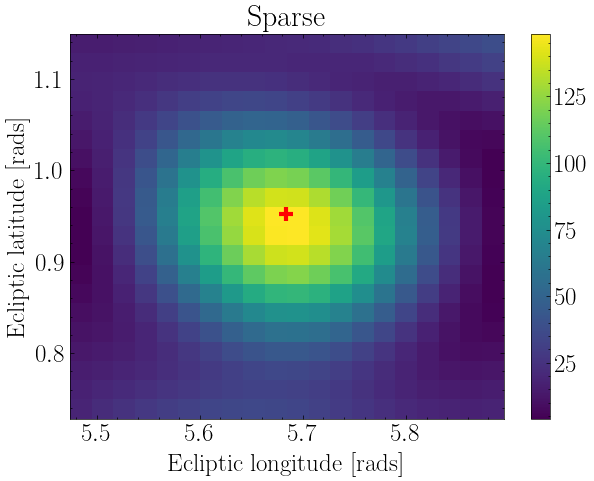

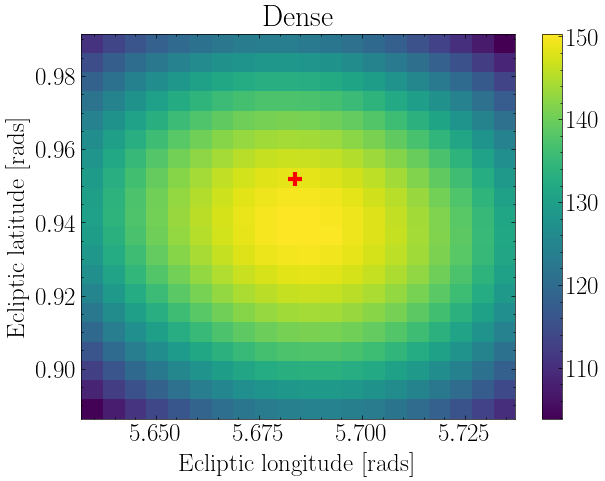



b'sobhb5'
1


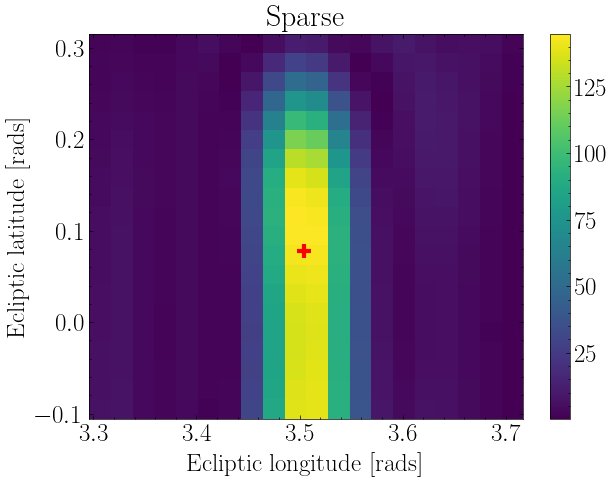

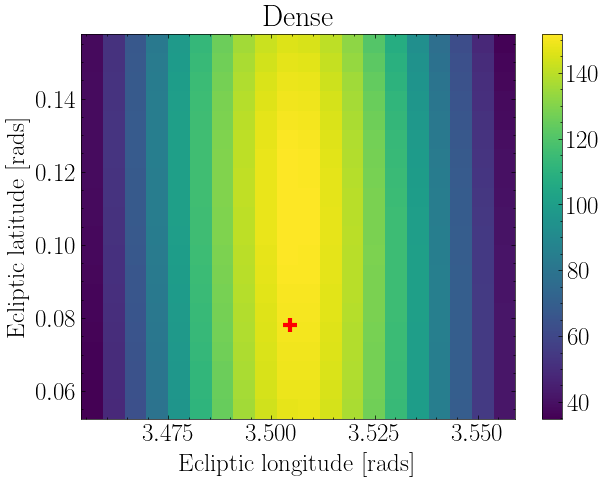



b'sobhb8'
3


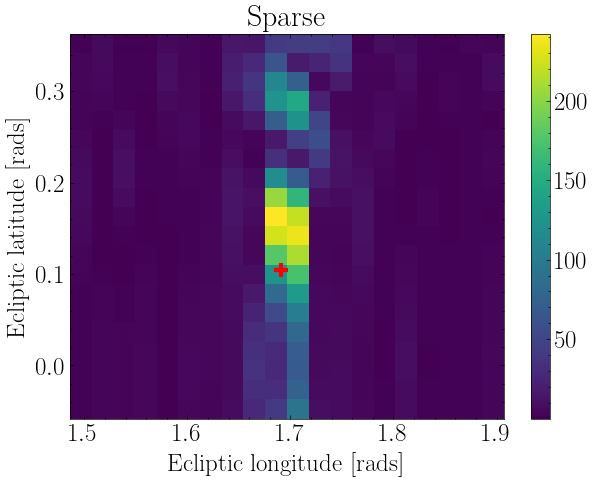

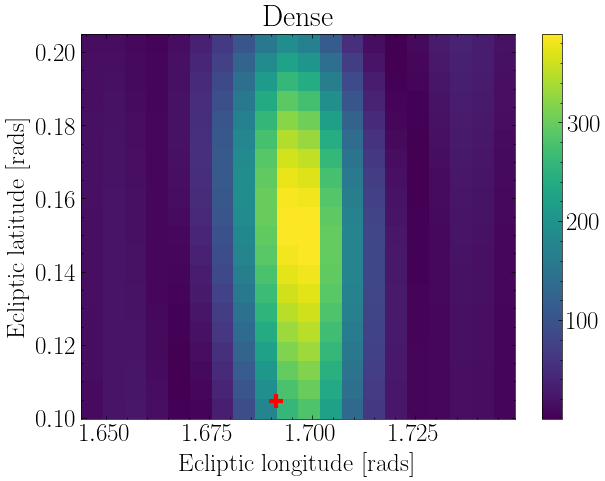



b'sobhb9'
2


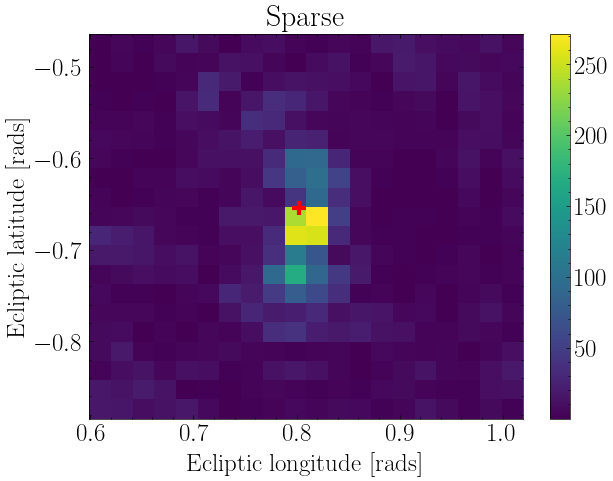

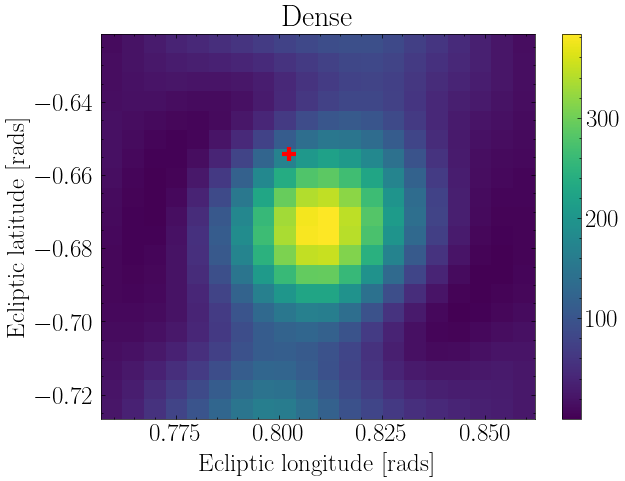



b'sobhb10'
0


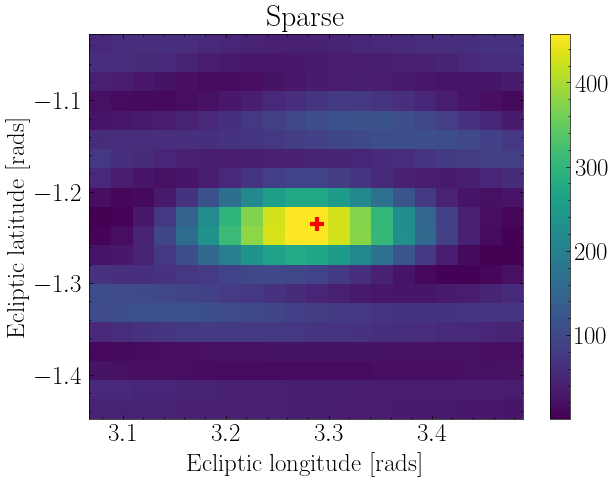

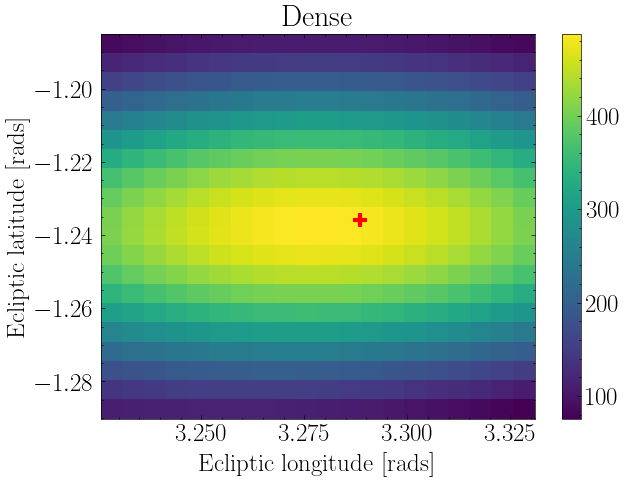

In [43]:
for sobbh in catalog:
    print(sobbh['Name'][0])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat_injected = sobbh['EclipticLatitude']
    ecliptic_long_injected = sobbh['EclipticLongitude']
    # f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    print(index)
    
    max_upsilon = search_results[index,-1]

    # parameters (FROM SEARCH)

    mc_search_result = search_results[index][0]
    q_search_result = search_results[index][1]
    cosinc_search_result = search_results[index][2]
    e0_search_result = search_results[index][3]
    f0_search_result = search_results[index][4]
    lambda_search_result = search_results[index][5]
    beta_search_result = search_results[index][6]
    psi_search_result = search_results[index][7]

    # Make a grid of (lambda,beta) around the found source
    sqrt_N = 20

    # SPARSE 
    lambdas_flat = np.linspace(lambda_search_result-0.2,lambda_search_result+0.2,sqrt_N)
    betas_flat = np.linspace(beta_search_result-0.2,beta_search_result+0.2,sqrt_N)
    X,Y = np.meshgrid(lambdas_flat,betas_flat)

    lambdas_unravelled = X.flatten()
    betas_unravelled = Y.flatten()

    statistics = WF_object.get_log_likelihood([float(mc_search_result)]*int(sqrt_N**2),
                                    [float(q_search_result)]*int(sqrt_N**2),
                                    [float(cosinc_search_result)]*int(sqrt_N**2),
                                    [float(e0_search_result)]*int(sqrt_N**2),
                                    [100.e+6]*int(sqrt_N**2),
                                    [float(f0_search_result)]*int(sqrt_N**2),
                                    [0]*int(sqrt_N**2), 
                                    lambdas_unravelled,
                                    betas_unravelled,
                                    [psi_search_result]*int(sqrt_N**2),
                                    compute_search_statistic=True,
                                    num_likelihood_chunks=1)

    plt.figure(figsize=(7,5))
    plt.title('Sparse')
    plt.pcolormesh(X,Y,statistics.reshape(sqrt_N,sqrt_N))
    plt.colorbar()
    plt.scatter(ecliptic_long_injected,ecliptic_lat_injected,marker='+',s=100,color='r',linewidths=3)
    plt.xlabel('Ecliptic longitude [rads]')
    plt.ylabel('Ecliptic latitude [rads]')
    plt.show()
    
    print('\n')





    
    # DENSE (PRECISE)
    lambdas_flat = np.linspace(lambda_search_result-0.05,lambda_search_result+0.05,sqrt_N)
    betas_flat = np.linspace(beta_search_result-0.05,beta_search_result+0.05,sqrt_N)

    X,Y = np.meshgrid(lambdas_flat,betas_flat)

    lambdas_unravelled = X.flatten()
    betas_unravelled = Y.flatten()

    statistics = WF_object.get_log_likelihood([float(mc_search_result)]*int(sqrt_N**2),
                                    [float(q_search_result)]*int(sqrt_N**2),
                                    [float(cosinc_search_result)]*int(sqrt_N**2),
                                    [float(e0_search_result)]*int(sqrt_N**2),
                                    [100.e+6]*int(sqrt_N**2),
                                    [float(f0_search_result)]*int(sqrt_N**2),
                                    [0]*int(sqrt_N**2), 
                                    lambdas_unravelled,
                                    betas_unravelled,
                                    [psi_search_result]*int(sqrt_N**2),
                                    compute_search_statistic=True,
                                    num_likelihood_chunks=1)

    plt.figure(figsize=(7,5))
    plt.title('Dense')
    plt.pcolormesh(X,Y,statistics.reshape(sqrt_N,sqrt_N))
    plt.colorbar()
    plt.scatter(ecliptic_long_injected,ecliptic_lat_injected,marker='+',s=100,color='r',linewidths=3)
    plt.xlabel('Ecliptic longitude [rads]')
    plt.ylabel('Ecliptic latitude [rads]')
    plt.show()
    
    print('\n')

        

In [44]:
catalog['Name'] = np.array([['Source 1'],
                            ['Source 5'],
                            ['Source 8'],
                            ['Source 9'],
                            ['Source 10']])

In [45]:
catalog

array([[(b'Source 1',  0.95188129, 5.68386251, 35.43281526, 32.08923154,  0.76362113,  0.20671311, 2.97932603, 0.00585831, 3.39443645, 3.17655019, 0.03487549, 159.90495375, 63116299.52709119, 5)],
       [(b'Source 5',  0.07815072, 3.50441556, 34.49963611, 28.80245058, -0.68194728, -0.38575676, 0.73822259, 0.01224273, 1.99657778, 1.86111089, 0.03666138, 168.31023558, 63116299.52709119, 5)],
       [(b'Source 8',  0.10456065, 1.69109547, 33.71236208, 19.9264734 , -0.02249481,  0.03235129, 1.52606313, 0.02765439, 2.18609436, 1.62449478, 0.00756939,  34.01333394, 63116299.52709119, 5)],
       [(b'Source 9', -0.65418243, 0.80262274, 30.72461853, 29.22732928,  0.12365048,  0.07837219, 2.07508954, 0.02376784, 1.34157913, 5.38484695, 0.01887628,  85.5406956 , 63116299.52709119, 5)],
       [(b'Source 10', -1.23580204, 3.28849108, 48.08772202, 42.09331487, -0.11022612,  0.19437036, 2.68502345, 0.01131113, 3.13891375, 1.99955468, 0.03678894, 168.91140735, 63116299.52709119, 5)]],
      dtype=[

In [46]:
matplotlib.rcParams.update({'font.size': 28})


b'Source 1'
4


b'Source 5'
1


b'Source 8'
3


b'Source 9'
2


b'Source 10'
0




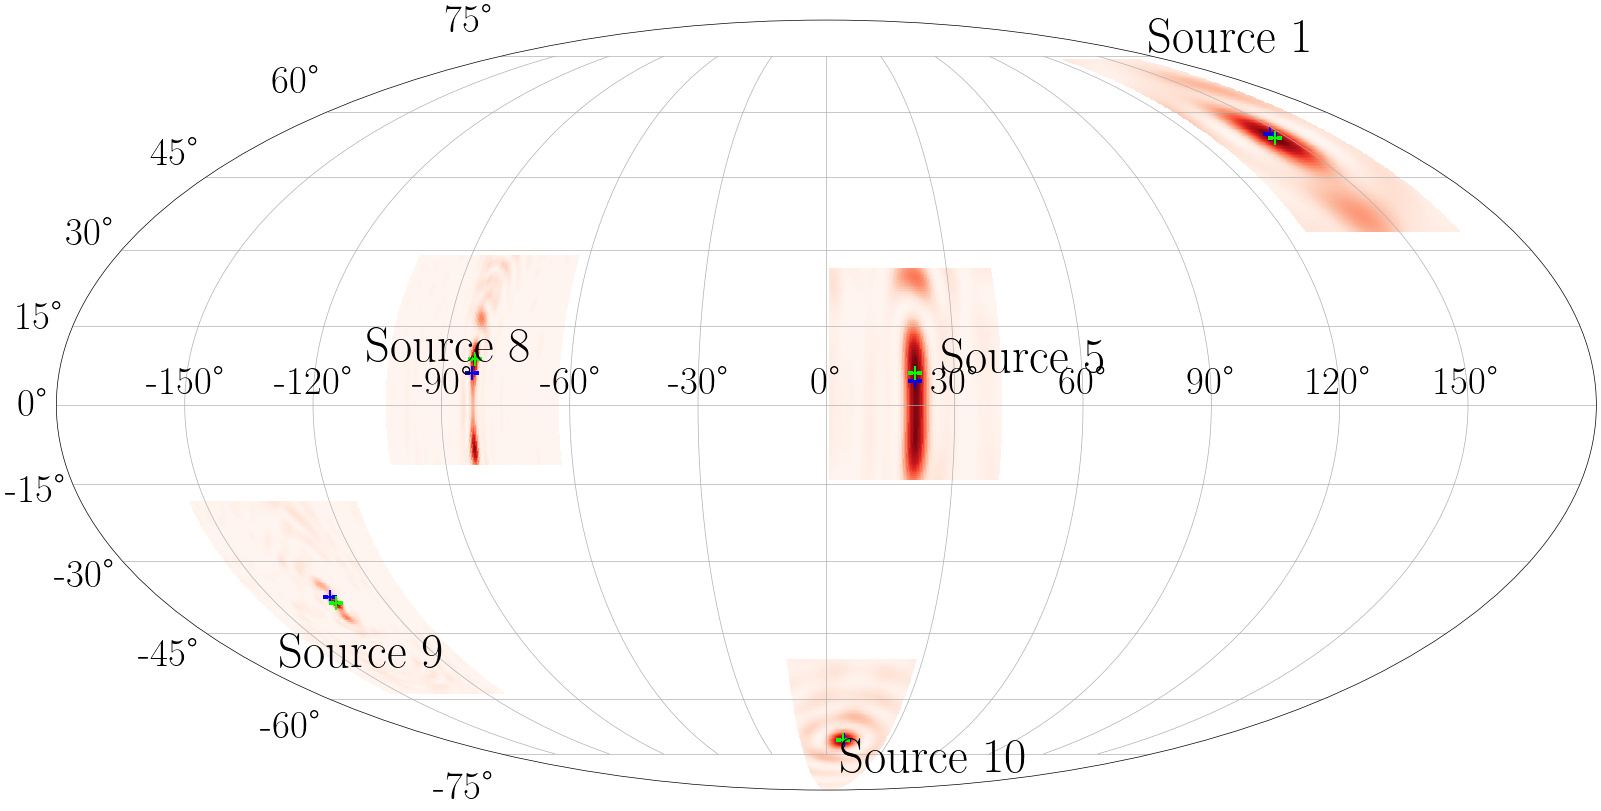

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(projection="mollweide")
# plt.title("Mollweide")
plt.grid(True)



for sobbh in catalog:
    print(sobbh['Name'][0])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat_injected = sobbh['EclipticLatitude']
    ecliptic_long_injected = sobbh['EclipticLongitude']
    # f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    print(index)
    
    max_upsilon = search_results[index,-1]

    # parameters (FROM SEARCH)

    mc_search_result = search_results[index][0]
    q_search_result = search_results[index][1]
    cosinc_search_result = search_results[index][2]
    e0_search_result = search_results[index][3]
    f0_search_result = search_results[index][4]
    lambda_search_result = search_results[index][5]
    beta_search_result = search_results[index][6]
    psi_search_result = search_results[index][7]

    # Make a grid of (lambda,beta) around the found source
    sqrt_N = 120 #NOTE: RESOLUTION OF SKYMAP AROUND INJECTION, LOWER FOR FASTER DEBUGGING

    # SPARSE 
    lambdas_flat = np.linspace(lambda_search_result-0.35,lambda_search_result+0.35,sqrt_N)
    betas_flat = np.linspace(beta_search_result-0.35,beta_search_result+0.35,sqrt_N)
    X,Y = np.meshgrid(lambdas_flat,betas_flat)

    lambdas_unravelled = X.flatten()
    betas_unravelled = Y.flatten()

    statistics = WF_object.get_log_likelihood([float(mc_search_result)]*int(sqrt_N**2),
                                    [float(q_search_result)]*int(sqrt_N**2),
                                    [float(cosinc_search_result)]*int(sqrt_N**2),
                                    [float(e0_search_result)]*int(sqrt_N**2),
                                    [100.e+6]*int(sqrt_N**2),
                                    [float(f0_search_result)]*int(sqrt_N**2),
                                    [0]*int(sqrt_N**2), 
                                    lambdas_unravelled,
                                    betas_unravelled,
                                    [psi_search_result]*int(sqrt_N**2),
                                    compute_search_statistic=True,
                                    num_likelihood_chunks=1)

    # plt.figure(figsize=(7,5))
    # plt.title('Sparse')
    plt.pcolormesh(X-np.pi,Y,statistics.reshape(sqrt_N,sqrt_N),cmap='Reds')
    # plt.colorbar()
    plt.scatter(ecliptic_long_injected-np.pi,ecliptic_lat_injected,marker='+',s=100,color='b',linewidths=1.5)
    plt.scatter(lambda_search_result-np.pi,beta_search_result,marker='+',s=100,color='lime',linewidths=1.5)

    plt.text((ecliptic_long_injected-np.pi)*1.3,ecliptic_lat_injected*1.4,sobbh['Name'][0].decode(),fontsize=35)
    # plt.xlabel('Ecliptic longitude [rads]')
    # plt.ylabel('Ecliptic latitude [rads]')
    # plt.show()
    
    print('\n')




plt.savefig('Skymap.pdf')
plt.show()
